# <ins>Australia Rain Dataset<ins>

Our dataset comprises of weather condition metrics, rainfall amount and whether it rained today or tomorrow.  
The dataset covers 49 locations in Australia with daily measurements between 2008 and 2017([source](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)).

# Problem Statement

Accurately predict the daily rainfall amount for  the city of Sydney

# Executive Smmary

### Context


Human-caused climate change intensifies the heaviest downpours. More than 70% of the planet's surface is water, and as the world warms, more water evaporates from oceans, lakes, and soils. Every 1°F rise also allows the atmosphere to hold 4% more water vapor([source](https://www.climatecentral.org/news/report-pouring-it-on-climate-change-intensifies-heavy-rain-events#:~:text=Human%2Dcaused%20climate%20change%20intensifies,hold%204%25%20more%20water%20vapor.)).


As such the Department of Planning, Industry and Environment(DPIE) of New South Wales is particularly interested in Rainfall statistics, primarily Sydney, as it is one of the more densely populated cities within the state. Predicting the amount of Rainfall is imperative to the planning of the infrastructure of the city. Knowing and predicting Rainfall would aid in the prevention of flooding and the accumulation of stagnant waters. With this information, the DPIE will be able to gauge its drainage capacity and make better decisions.


### Scope

The objective of this project is to be able to predict daily Rainfall for the city of Sydney, to aid the DPIE of NSW to more accurately gauge their current position with Sydney's infrastructures and asssit in their future plans.

# Table of Contents

### Contents:
- Australia - ***1_AUS_Clean_EDA.ipynb***
    - [Data Importing and Cleaning](#Data-Importing-and-Cleaning)
        - [Splitting by Cities](#Splitting-by-Cities)
        - [Exporting Cleaned Data](#Data-Export)
    - [EDA](#EDA)
        - [Distribution of Features](#Distribution-of-Features)
        - [Correlation Heatmap](#Correlation-Heatmap)
        - [Pairplots](#Pairplots)
        - [Bargraphs](#Bargraphs)
- Sydney - ***2_Sydney_Clean_EDA_.ipynb***
   - Data Importing and Cleaning
   - EDA
   - Exporting Cleaned Data
   - Modelling - ***3_Sydney_Model.ipynb***
     - Time Series
        - SARIMAX
        - fb Prophet
     - Time Series Neural Network
        - Gated Recurrent Unit
   - Conclusions and Recommendations

### Data Dicitonary  

    Date — date of observation
    Location — The common name of the location of the weather station
    MinTemp — The minimum temperature in degrees celsius
    MaxTemp — The maximum temperature in degrees celsius
    Rainfall — The amount of rainfall recorded for the day in mm
    Evaporation — The so-called Class A pan evaporation (mm) in the 24 hours to 9am
    Sunshine — The number of hours of bright sunshine in the day.
    WindGustDir — The direction of the strongest wind gust in the 24 hours to midnight
    WindGustSpeed — The speed (km/h) of the strongest wind gust in the 24 hours to midnight
    WindDir9am — Direction of the wind at 9am
    WindDir3pm — Direction of the wind at 3pm
    WindSpeed9am — Wind speed (km/hr) averaged over 10 minutes prior to 9am
    WindSpeed3pm — Wind speed (km/hr) averaged over 10 minutes prior to 3pm
    Humidity9am — Humidity (percent) at 9am
    Humidity3pm — Humidity (percent) at 3pm
    Pressure9am — Atmospheric pressure (hpa) reduced to mean sea level at 9am
    Pressure3pm — Atmospheric pressure (hpa) reduced to mean sea level at 3pm
    Cloud9am — Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear * sky whilst an 8 indicates that it is completely overcast.
    Cloud3pm — Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
    Temp9am — Temperature (degrees C) at 9am
    Temp3pm — Temperature (degrees C) at 3pm
    RainToday — Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
    RISK_MM — The amount of rain. A kind of measure of the "risk".
    RainTomorrow — The target variable. Did it rain tomorrow?


# Data Importing and Cleaning

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

### Data import

In [2]:
aus_rain = pd.read_csv('./datasets/aus_weather.csv')

In [3]:
aus_rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


Originally, this dataset from kaggle was a classification problem, in which the objective was to use the given features of any given day and predict if it would rain the next day.  
However, in our case we will be utilising this dataset to try to predict daily rainfall in Sydney.

# Splitting by Cities

In [4]:
#determining the number of cities
len(aus_rain['Location'].unique())

49

In [5]:
#creating a list of all the cities in the dataset
cities = aus_rain['Location'].unique().tolist()

### Viewing AUS as a whole

Since we have separated our cities. We shall be cleaning up this dataset and viewing Australia's weather as whole

In [7]:
aus_rain.isnull().sum().sort_values(ascending=False)

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
Location             0
RainTomorrow         0
RISK_MM              0
Date                 0
dtype: int64

In [8]:
#the columns with excessive null values should be dropped
aus_rain = aus_rain.drop(columns=['Cloud9am','Cloud3pm', 'Evaporation', 'Sunshine','RISK_MM'])

In [9]:
aus_rain.isnull().sum().sort_values(ascending=False)

Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
Rainfall          1406
RainToday         1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
Location             0
RainTomorrow         0
Date                 0
dtype: int64

In [10]:
#dropping all the null rows, so we have a complete dataset
aus_rain = aus_rain.dropna()

#seeing if our data has shrunk significantly or not
aus_rain.shape

(112925, 19)

In [11]:
#converting our date to datetime and checking the dtype
aus_rain['Date'] = pd.to_datetime(aus_rain['Date'])
aus_rain.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [12]:
#creating day, month and year columns for easier viewing
aus_rain['month'] = aus_rain['Date'].dt.month
aus_rain['year']= aus_rain['Date'].dt.year
aus_rain['day']= aus_rain['Date'].dt.day

In [13]:
aus_rain['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
#converting our Yes and Nos to a boolean
aus_rain["RainToday"] = aus_rain["RainToday"].map({"No":0, "Yes":1})
aus_rain["RainTomorrow"] = aus_rain["RainTomorrow"].map({"No":0, "Yes":1})

In [15]:
# Location, WindGustDir and WindDir9am/3pm are object and should be one hot encoded
aus_rain.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Temp9am                 float64
Temp3pm                 float64
RainToday                 int64
RainTomorrow              int64
month                     int64
year                      int64
day                       int64
dtype: object

In [16]:
#one hot encoding our nominal data
aus_rain_encoded = pd.get_dummies(aus_rain, columns=['Location'])
aus_rain_encoded = pd.get_dummies(aus_rain_encoded, columns=['WindGustDir'])
aus_rain_encoded = pd.get_dummies(aus_rain_encoded, columns=['WindDir9am'])
aus_rain_encoded = pd.get_dummies(aus_rain_encoded, columns=['WindDir3pm'])
aus_rain_encoded = pd.get_dummies(aus_rain_encoded, columns=['month'])

In [17]:
aus_rain.shape

(112925, 22)

In [18]:
aus_rain_encoded.shape

(112925, 121)

# Data Export

# EDA

Now that our data is complete, without much loss in data size, we can do some basic EDA to observe Australia's weather.

In [19]:
#separating our dates from the list of features we want to analyse
l1 = aus_rain.columns.tolist()
l2 = ['Date','day','month','year']
aus_cols = [x for x in l1 if x not in l2]

## Distrubtion of Features

In [20]:
#function to see the distribution of our features
def subplot_histograms(plotname, dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,60)) # specified figsize
    fig.suptitle(plotname, fontsize=16)# plot title added
    fig.subplots_adjust(top=0.95)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_title(column)  #title for each plot
        ax[i].set_xlabel(column, size = 'large') #xlabel
        ax[i].set_ylabel('Count', size= 'large')  #ylabel

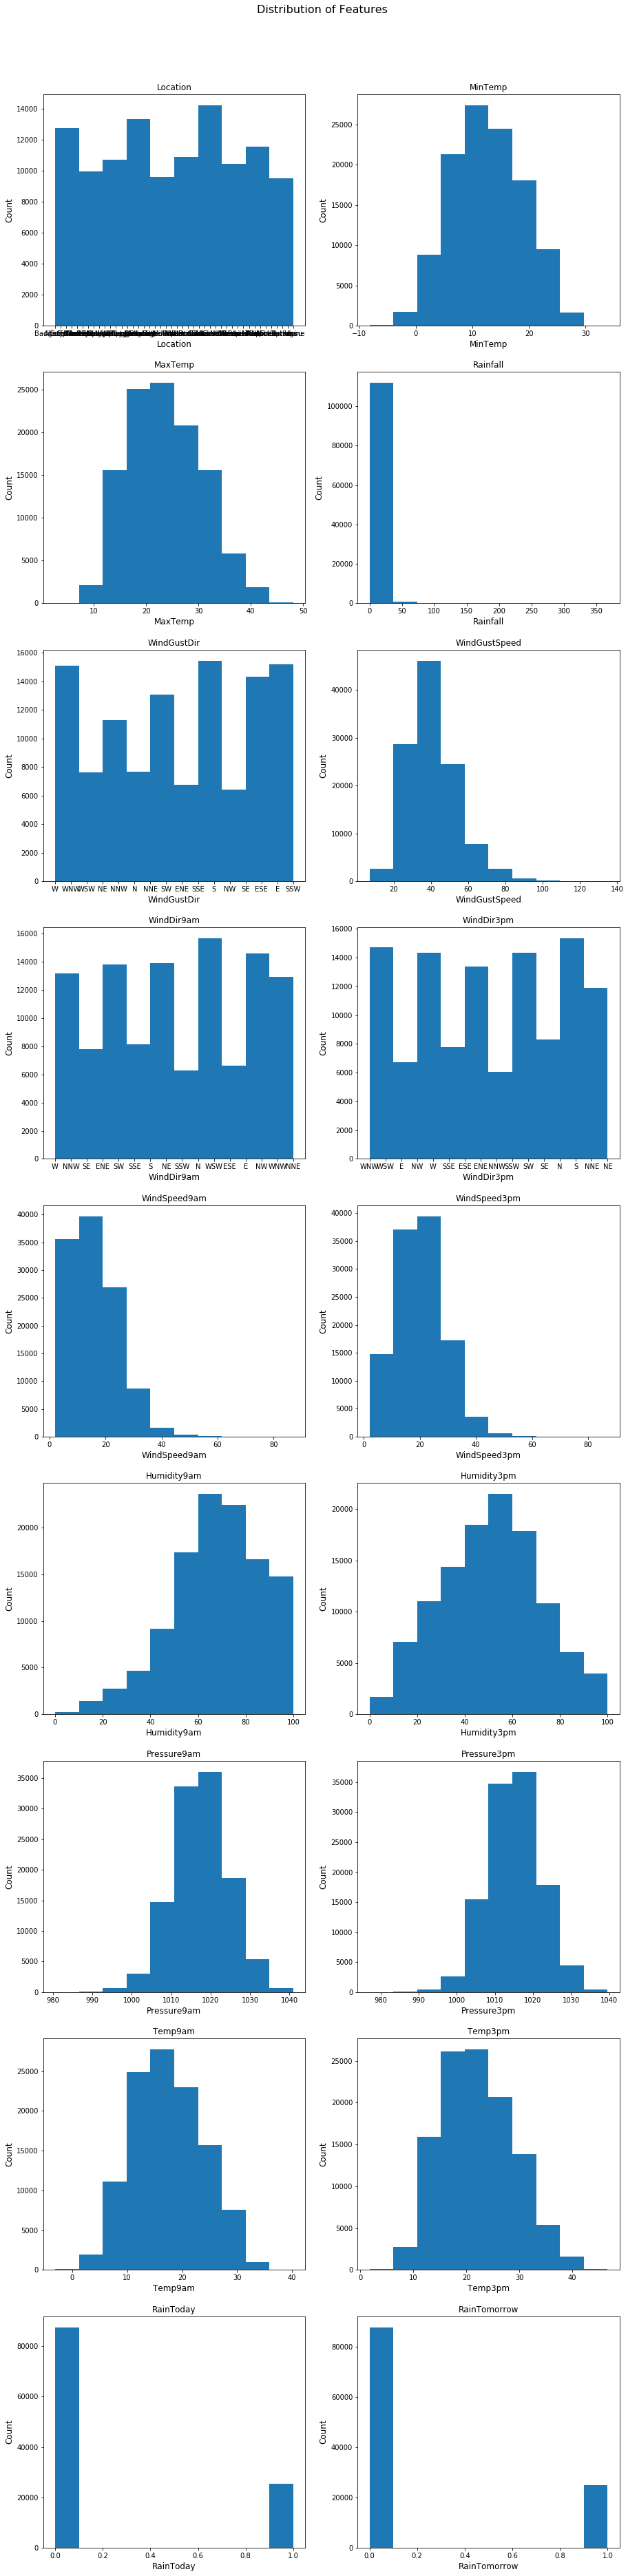

In [38]:
subplot_histograms('Distribution of Features',aus_rain,
                   aus_cols)
#plt.savefig('./images/dist_of_features.png', bbox_inches='tight')

Distributions of our features are fairly normalised.  
However, Wind Direction distribution stood out quite abit with some wind directions more prevalent than others. There seems to be a lot less Northern Winds and North-West winds.  
This could be attributed to the geographical location of Australia being in the lower hemisphere and being wedged between the Indian and Pacific Ocean. Its wind is primarily influenced by the convection currents of these oceans which explains why Southern winds are prevalant in Australia.

## Correlation Heatmap

(17.5, -0.5)

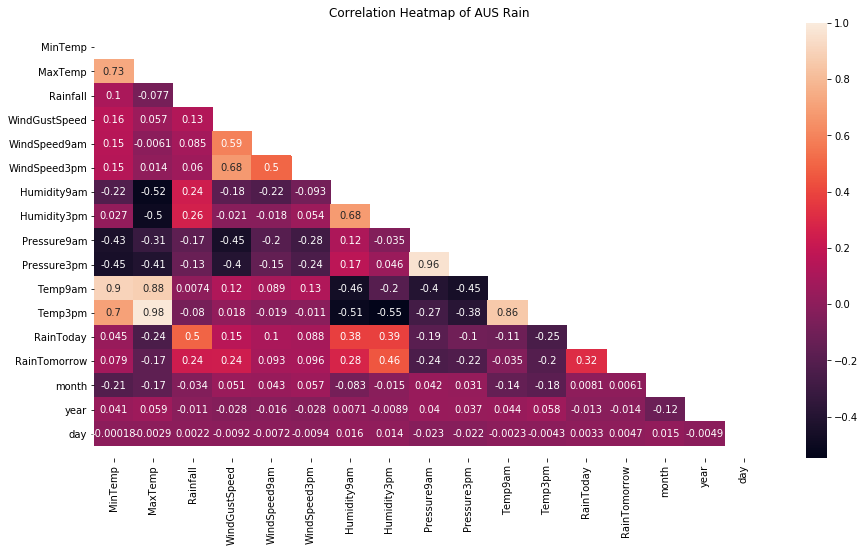

In [22]:
fig, ax = plt.subplots(figsize=(15,8)) #creating figure area
ax.set_title('Correlation Heatmap of AUS Rain') #setting title
mask = np.zeros_like(aus_rain.corr())
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(aus_rain.corr(), annot=True,mask=mask )  #plotting heatmap
bottom, top = ax.get_ylim() #add this
ax.set_ylim(bottom + 0.5, top - 0.5)

It is a given that Min/Max Temperatures and Measurements taken at 9am/3pm are collinear by nature.  
However, it can be said that no singular feature has a significantly large influence on the rainfall amount, or if it'll rain today(which is dependant on rainfall amount being more han 1mm) or rain tomorrow.

In [23]:
#lets take 3pm as the reference time and we want to know if it'll rain the next day, so we drop rain today
list1 = aus_rain.columns.tolist()
list2 = ['MinTemp','WinDir9am','WindSpeed9am','Humidity9am','Pressure9am','Temp9am','RainToday', 'Temp3pm']
pairplot_features = [x for x in list1 if x not in list2]

## Pairplots

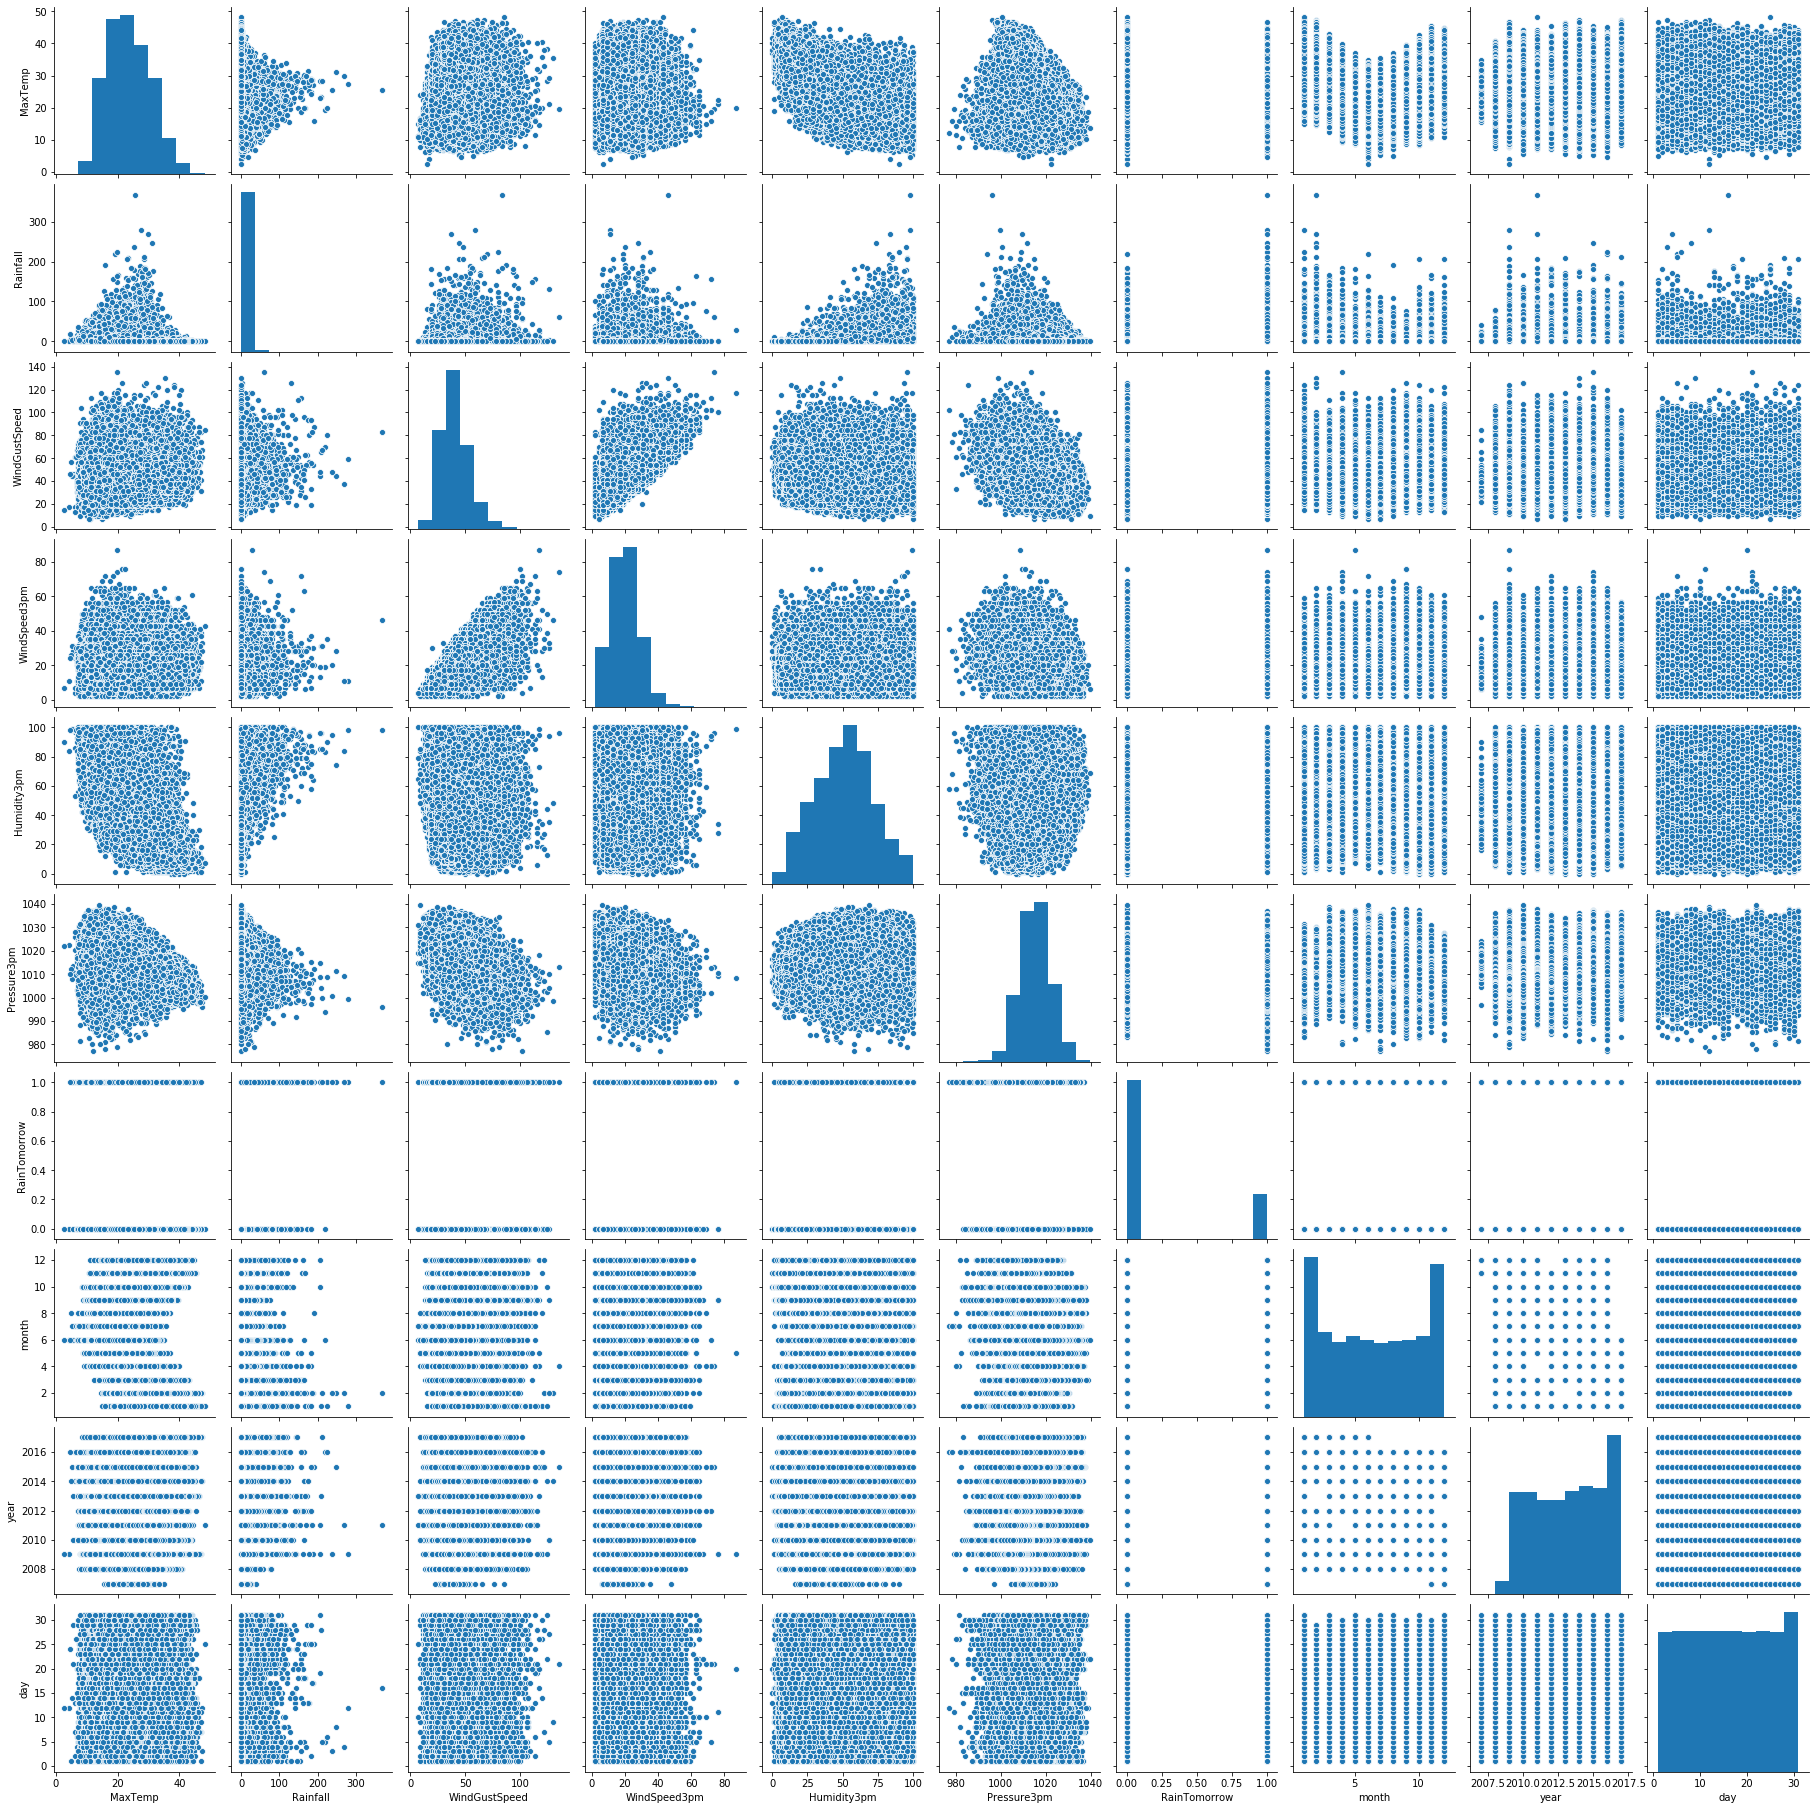

In [24]:
sns.pairplot(aus_rain[pairplot_features])

There isnt much correlation between our features as we saw in our correlation heatmap

As such we will be plotting our nominal features and see their influences on Rainfall

In [25]:
obj_typed = aus_rain.select_dtypes(include='object').columns.values.tolist()

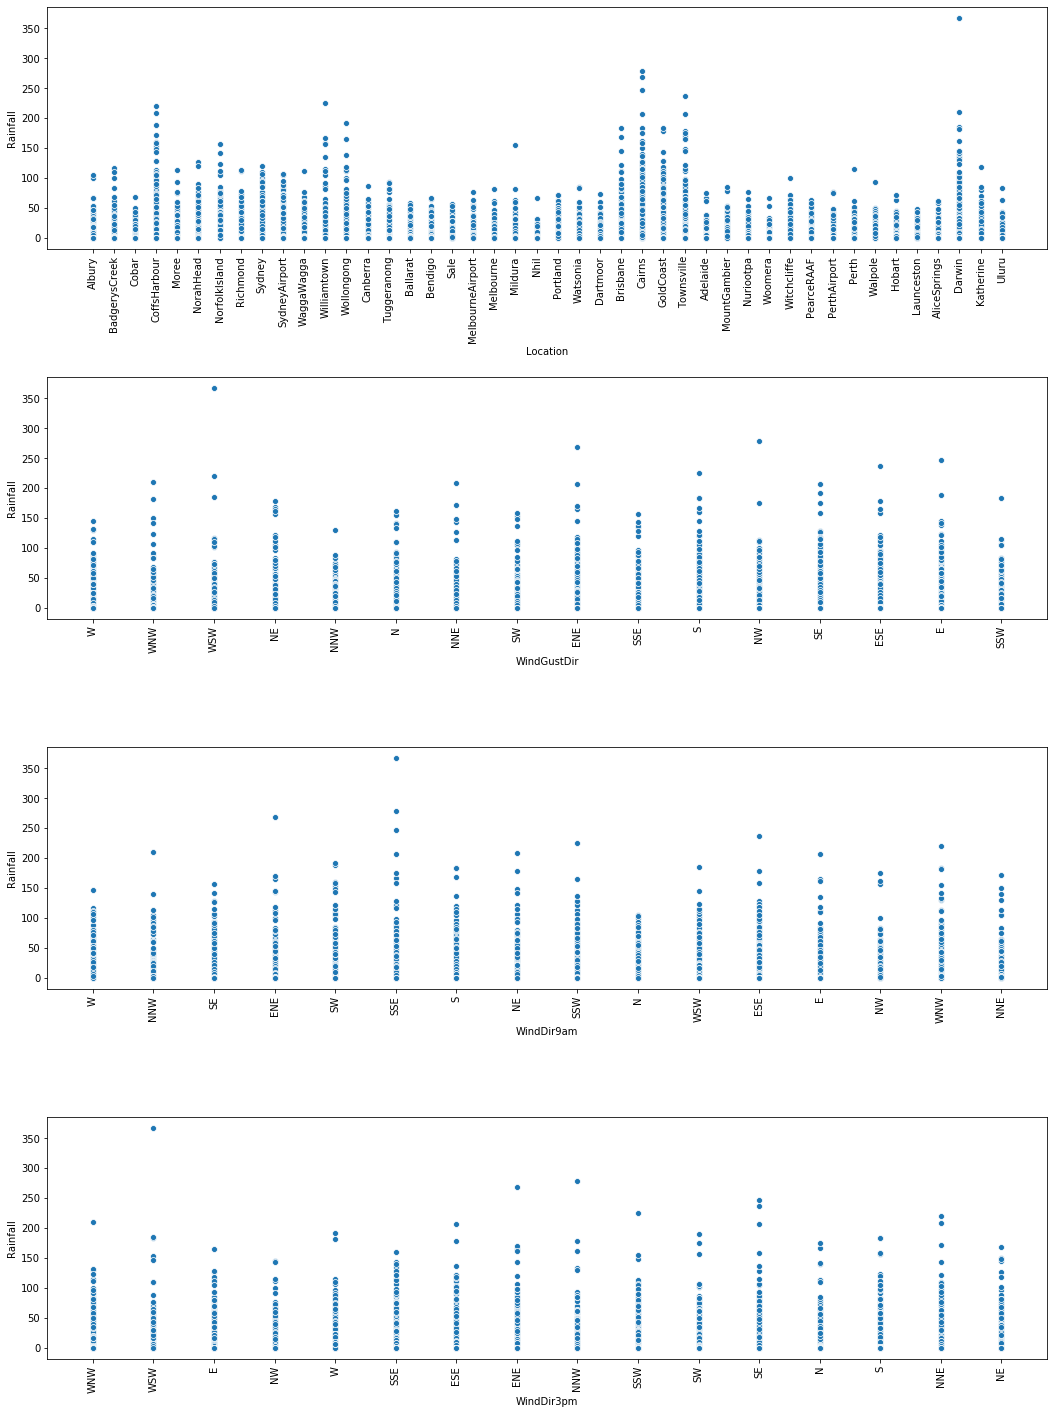

In [26]:
fig, axes= plt.subplots(nrows=4, ncols=1, figsize=(15,20))
axes = axes.ravel()
for i, object_t in enumerate(obj_typed):
    box = sns.scatterplot(x=object_t, y='Rainfall', data=aus_rain , ax= axes[i])
    x_ticks = aus_rain[object_t].unique()
    box.set_xticklabels(labels = x_ticks, rotation = 90 )
fig.tight_layout(pad=2.0)


From the scatterplot, we can see that there are a few locations that have more Rainfall than others.  
Locations such as Cairns and Darwin are located North of Australia. With Southernly prevalant winds, these locations will be first to hit by any incoming rain outside of the country.

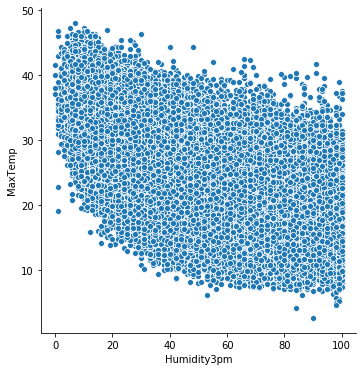

In [27]:
sns.pairplot(data = aus_rain, x_vars='Humidity3pm', y_vars='MaxTemp', height=5);

There seems to be some sort of correlation, although not strong the humidity and temperature. As Humidity increases, Max Temperature decreases.

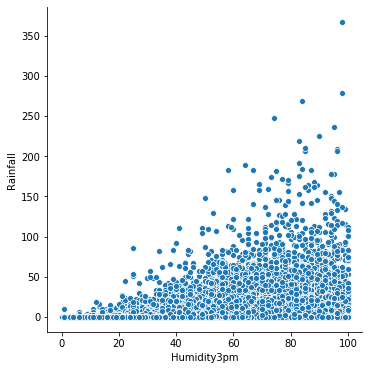

In [28]:
sns.pairplot(data = aus_rain, x_vars='Humidity3pm', y_vars='Rainfall', height=5);

There is an obvious correlation of humidity and amount of Rainfall. The more Humid it is, the more Rainfall is to be expected. The amount however, still varies at higher humidities. This could be influenced by other factors.

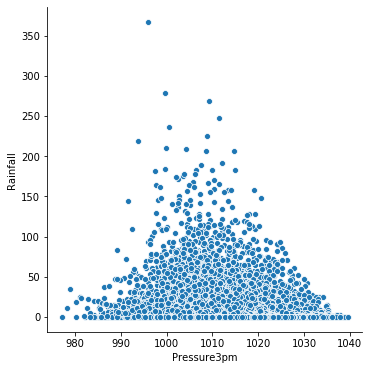

In [29]:
sns.pairplot(data = aus_rain, x_vars='Pressure3pm', y_vars='Rainfall', height=5);

There seems to be more Rainfall the closer the Pressure is to 1010. At higher or lower pressures, the amount seems to taper off.

## Bargraphs

Below, is another visualisation of the amount of Rainfall with respect to their locations, sorted from most to least amount of Rainfall.

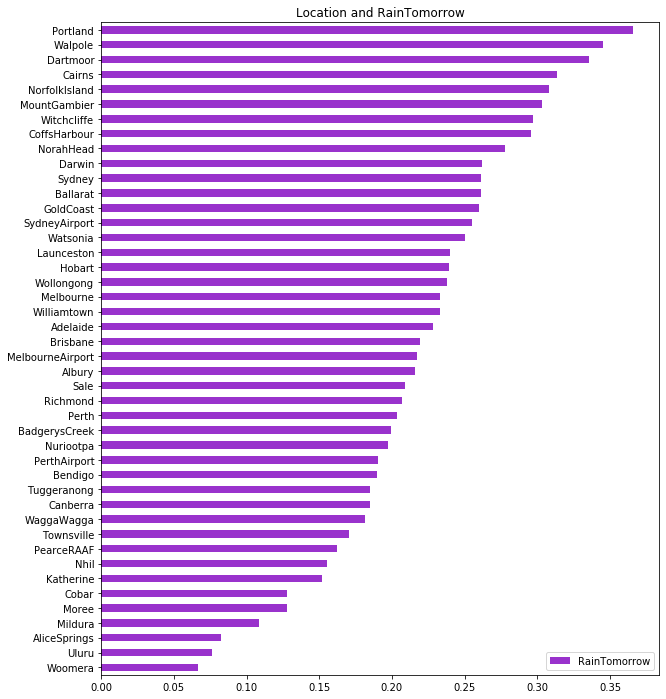

In [30]:
loc_rain = aus_rain.pivot_table(index="Location", values="RainTomorrow")
loc_rain_sorted = loc_rain.sort_values(by=["RainTomorrow"])
loc_rain_sorted.plot.barh(figsize=(10,12), color = 'darkorchid')
plt.title('Location and RainTomorrow')
plt.ylabel('');

As we know, countries have their seasons. Australia also has the 4 seasons in a year. Below we see a representation of Rainfall amount with respect to the months of the year, and its quite intuitive. Australia's winter months are around June and Summer being around December.

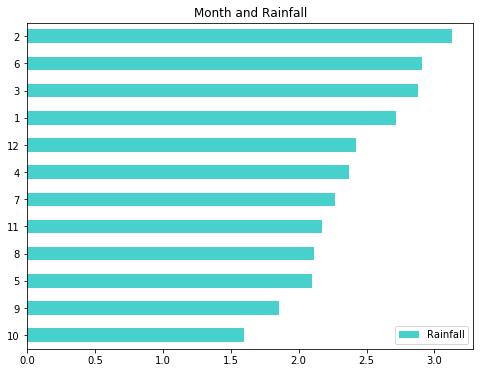

In [31]:
mth_rain = aus_rain.pivot_table(index="month", values="Rainfall")
mth_rain_sorted = mth_rain.sort_values(by=["Rainfall"])
mth_rain_sorted.plot.barh(figsize=(8,6), color= 'mediumturquoise')
plt.title('Month and Rainfall')
plt.ylabel('');

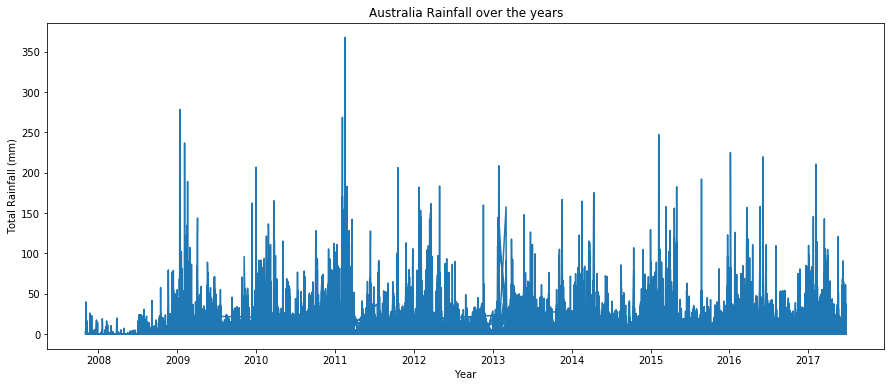

In [41]:
#rainfall amounts seen over the entire dataset. We do see some wave pattern tha tdictates a certain level of seasonality.
plt.figure(figsize = (15,6))
plt.plot(aus_rain['Date'], aus_rain['Rainfall'])
plt.ylabel('Total Rainfall (mm)')
plt.xlabel('Year')
plt.title('Australia Rainfall over the years');
#plt.savefig('./images/Aus_rain_year.png', bbox_inches='tight')

As we can see that Australia can be 'Rainier' in certain months, however this may not apply to all the locations within Australia. Below is a plot of every location, with Rainfall amount against the months.

In [33]:
cities = aus_rain['Location'].unique().tolist()

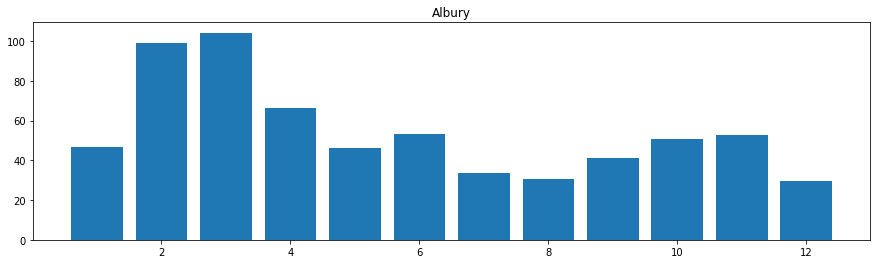

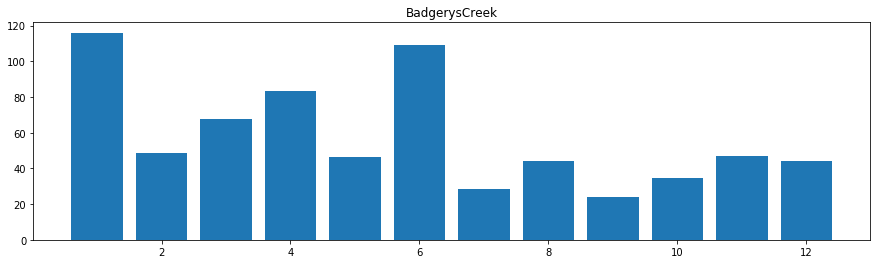

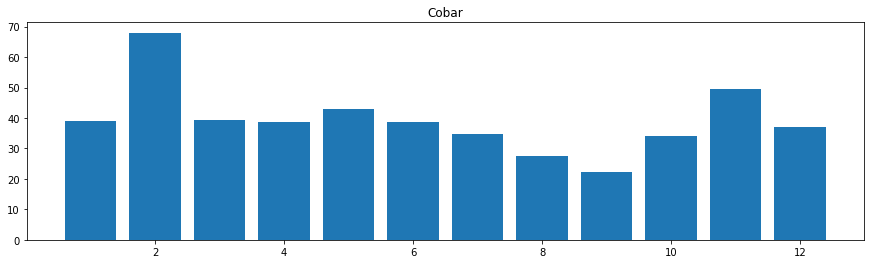

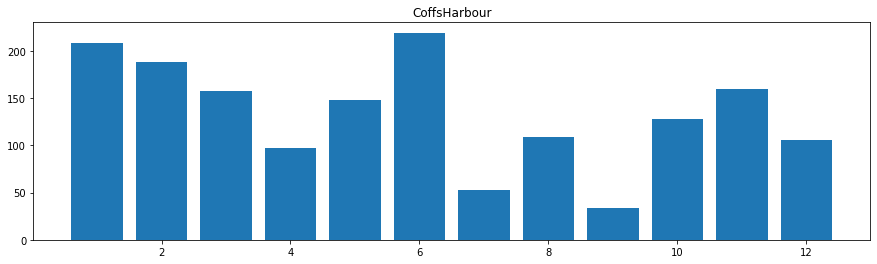

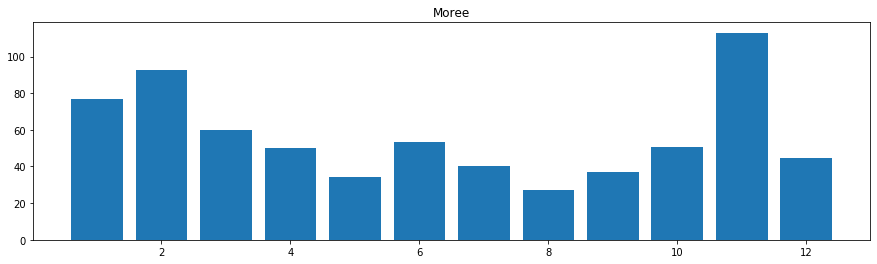

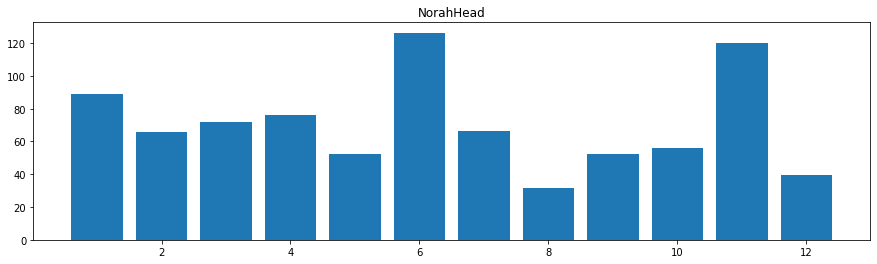

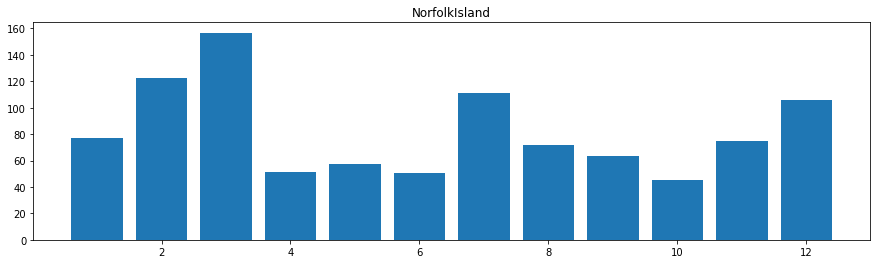

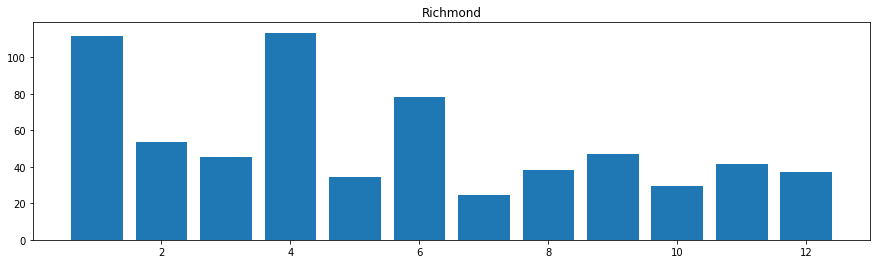

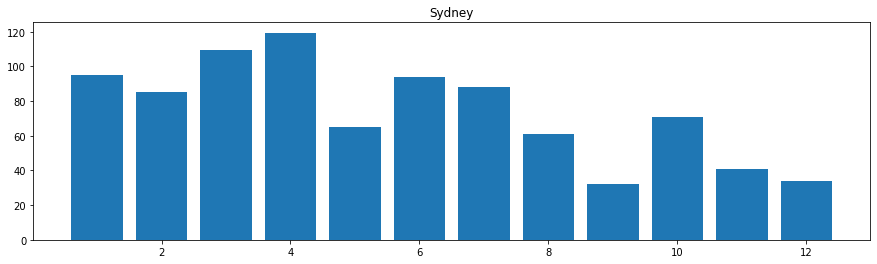

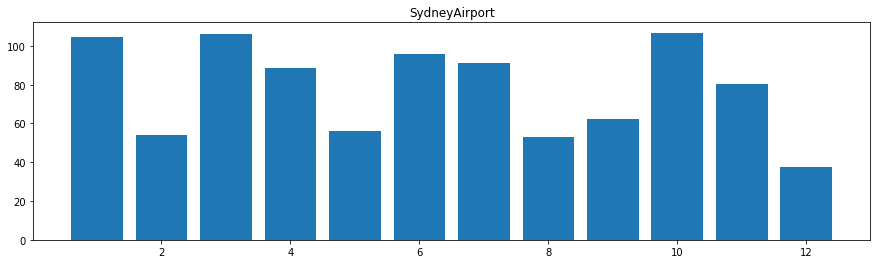

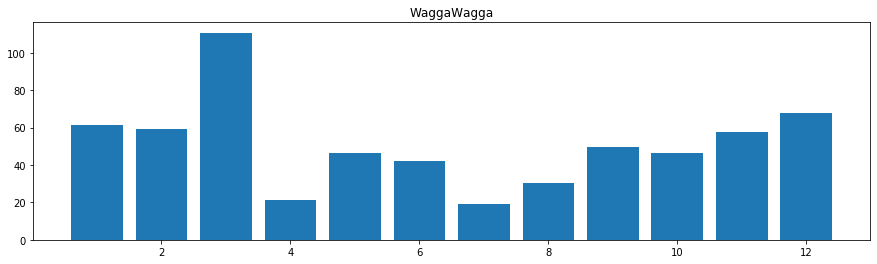

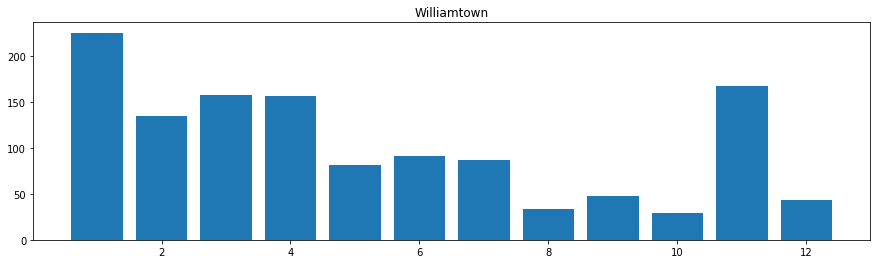

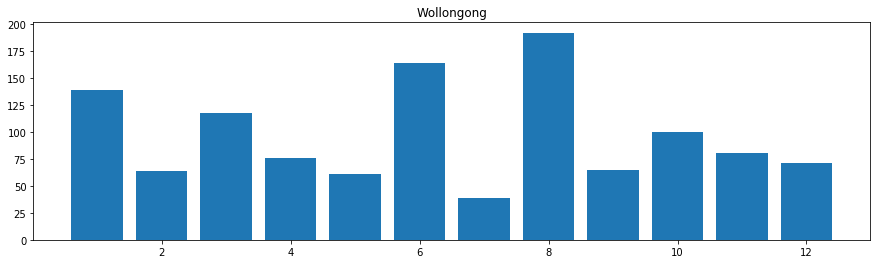

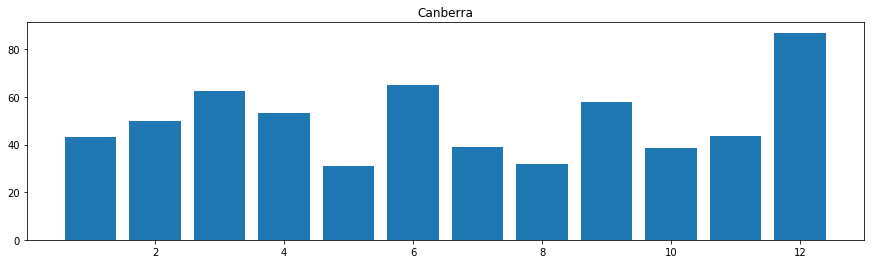

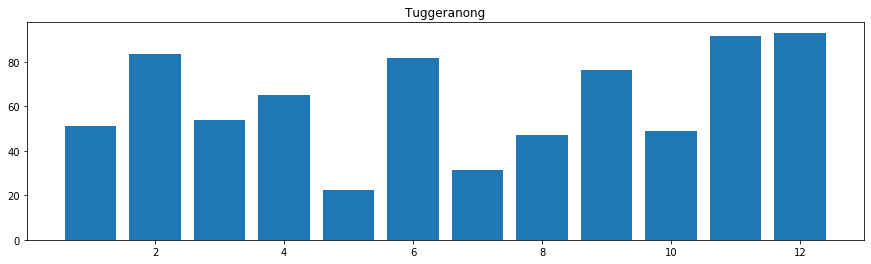

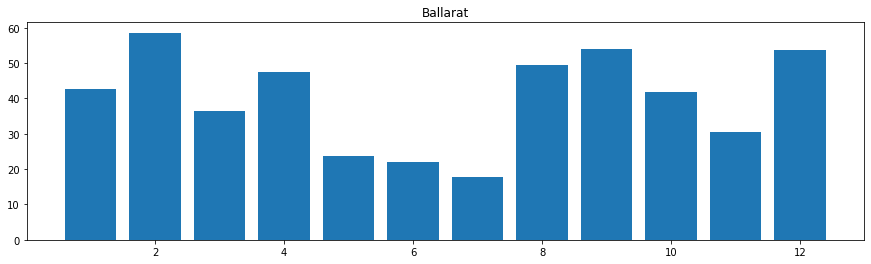

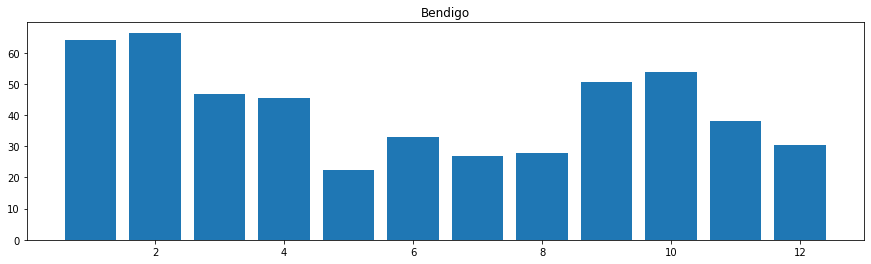

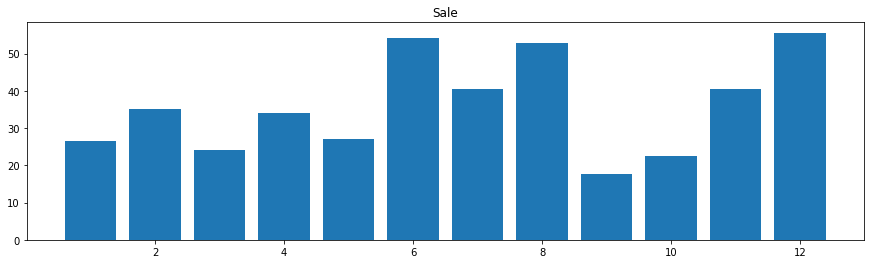

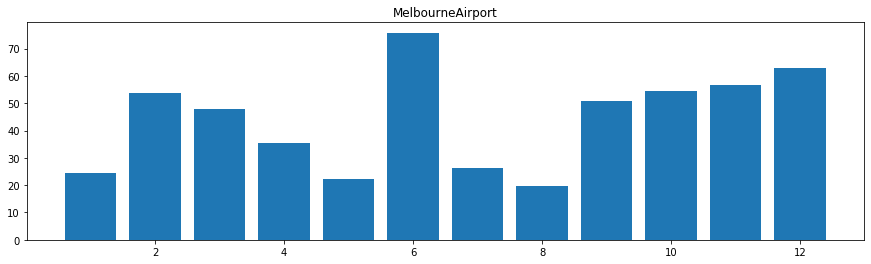

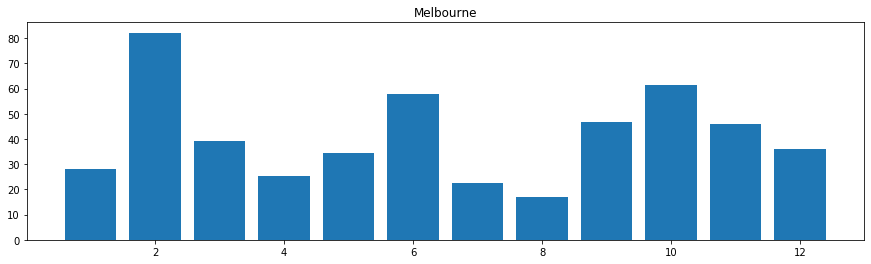

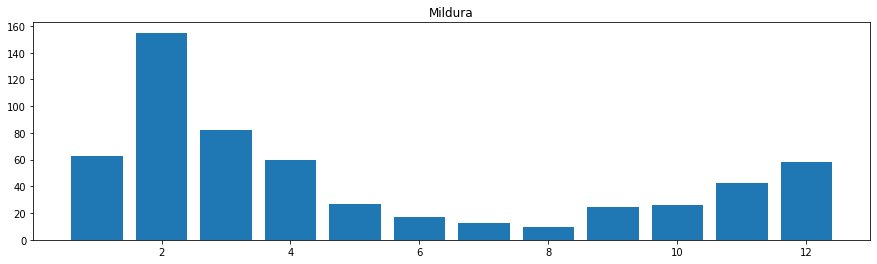

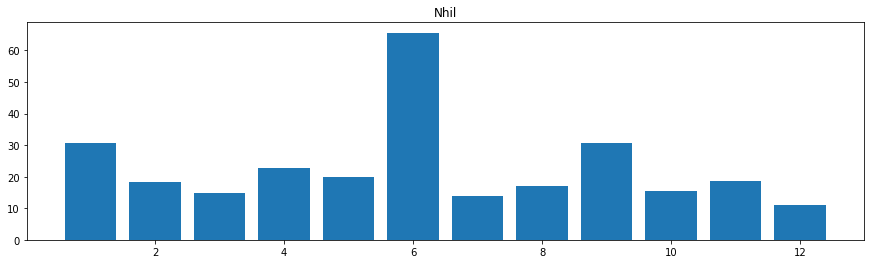

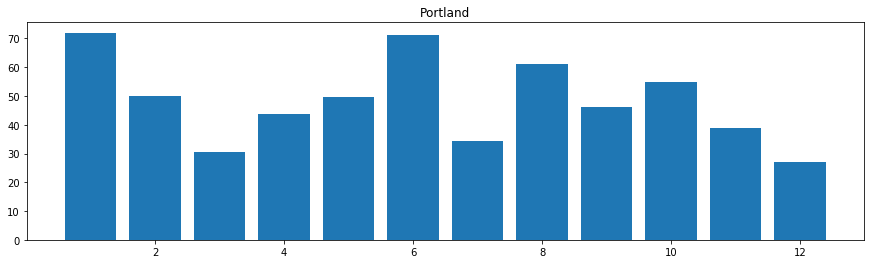

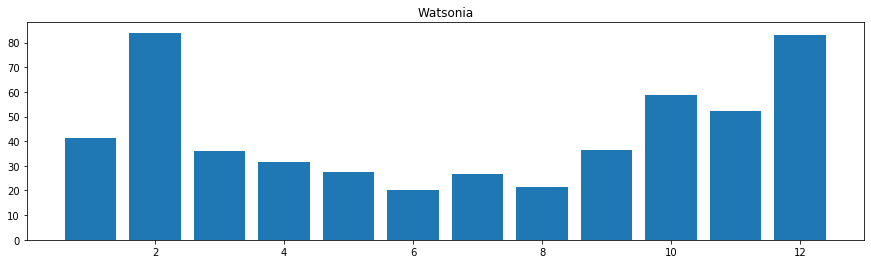

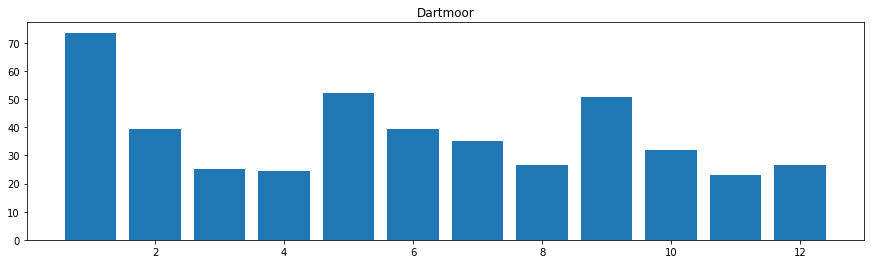

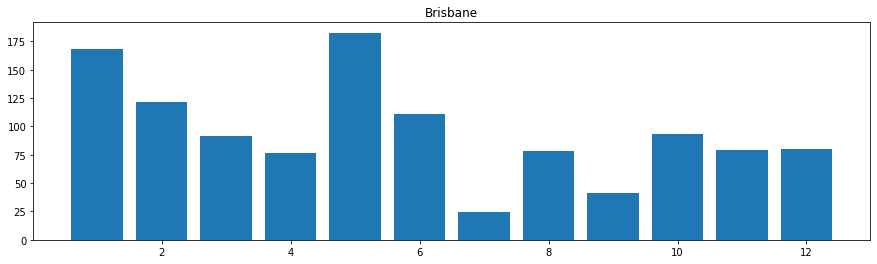

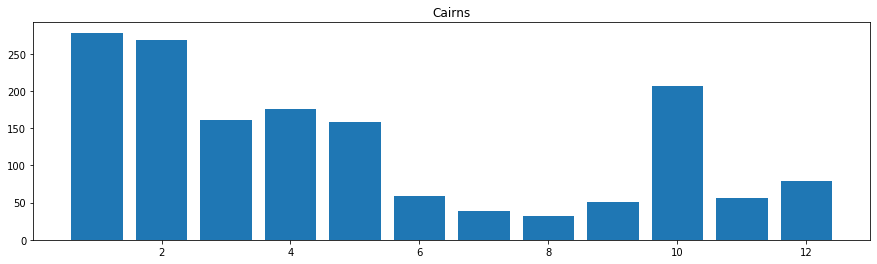

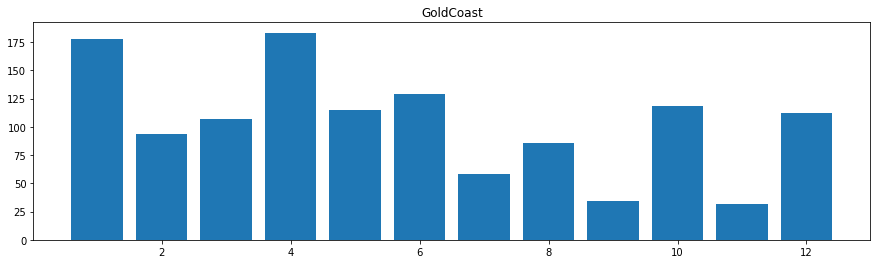

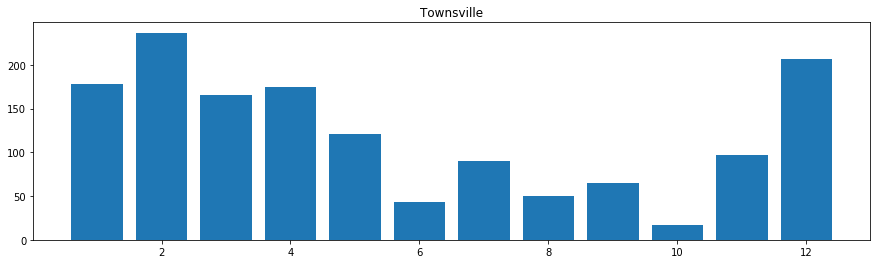

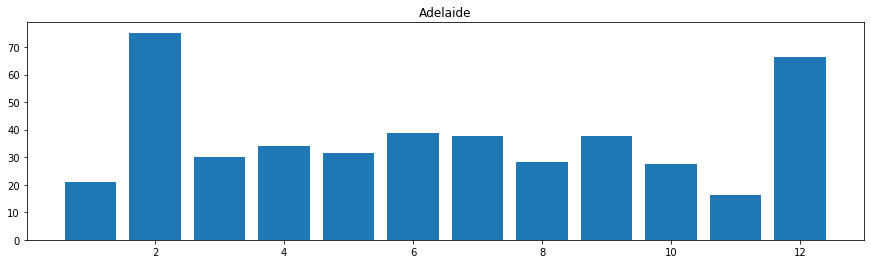

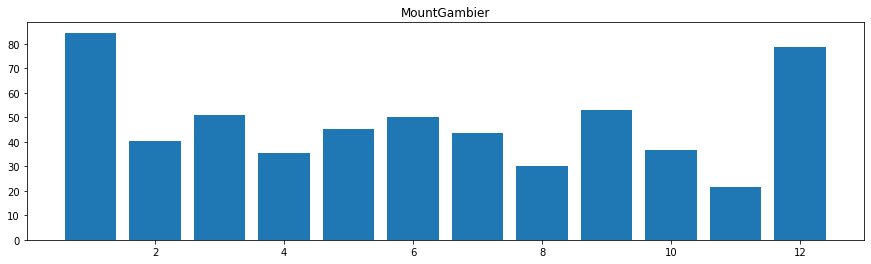

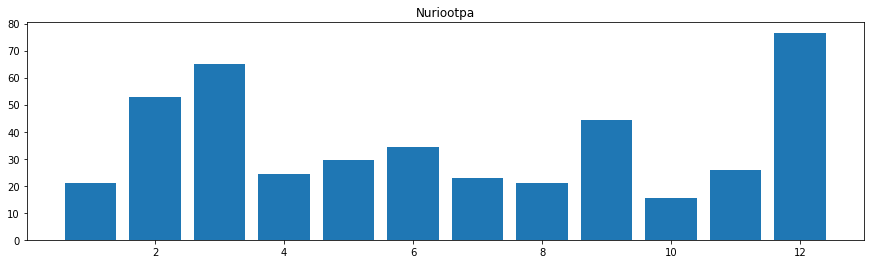

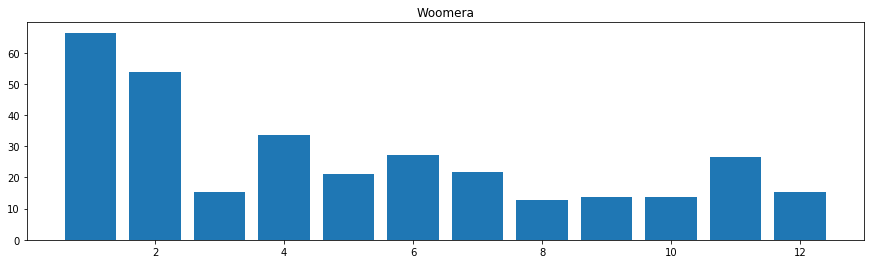

KeyboardInterrupt: 

In [34]:
for i in cities:
    locmask = aus_rain['Location'] == i
    plotloc = aus_rain.loc[locmask,['month','Rainfall']]
    plt.figure(figsize = (15,4))
    plt.title(i)
    plt.bar(plotloc['month'], plotloc['Rainfall'])
    plt.show()

It appears that the 'Rainier' months are different for different locations. Our observations of rainfall amount and its correlation with respect to the months are sporadic at best. There may be more to what influences the Rainfall of a specific location than simply Australia's season as a whole.